# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(bookReviewDataSet_filename, header=0)

df.head()

,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

We will be using the bookReview Dataset. We will be predicting a review score on a range of 1 to 5 with 1 being the most negative and 5 being the most positive sentiment. The label will be a new column we will create called "Review Score" which quantifies the sentiment of the review further than just a simple binary classification. This would be a supervised learning problem since we have the "Positive Review" column that labels the true "sentiments" of the reviews which we will reference to when creating initial data for "Review Score", and then use that data in order to train/assess our model for new unseen data. This would be a multi-class classification problem with the options being on a scale of 1 to 5. We will be deriving our features from the text in the "Review" column that will be transformed into numerical representation using TF-IDF vectorization. This is an important problem because it can effectively indicate whether a product/person/or anything else will be well received or not and track public opinions in a sense. It gives deeper insights rather than just a binary classification, which may provide better feedback and improvements. They can also assess each user's individual preferences by their reviews and recommend books based on that. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [3]:
print(df.shape)
print(df.columns)
df.head(10)

(1973, 2)
Index(['Review', 'Positive Review'], dtype='object')


,Review,Positive Review
0,This was perhaps the best of Johannes Steinhof...,True
1,This very fascinating book is a story written ...,True
2,The four tales in this collection are beautifu...,True
3,The book contained more profanity than I expec...,False
4,We have now entered a second time of deep conc...,True
5,I don't know why it won the National Book Awar...,False
6,The daughter of a prominent Boston doctor is d...,False
7,I was very disapointed in the book.Basicly the...,False
8,I think in retrospect I wasted my time on this...,False
9,I have a hard time understanding what it is th...,False


In [4]:
print(df.dtypes)
df.describe(include='all')

Review             object
Positive Review      bool
dtype: object


,Review,Positive Review
count,1973,1973
unique,1865,2
top,I have read several of Hiaasen's books and lov...,False
freq,3,993


False    993
True     980
Name: Positive Review, dtype: int64


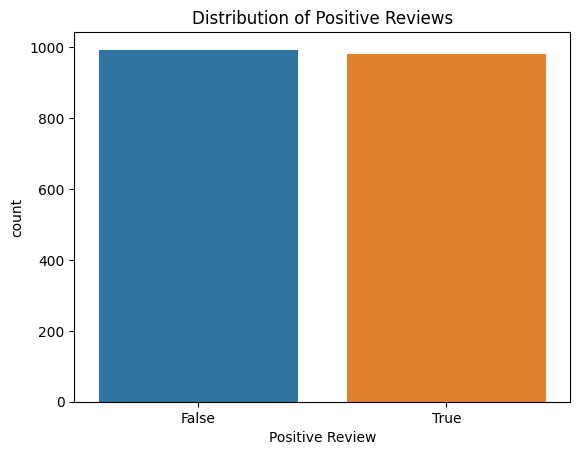

In [5]:
class_counts = df['Positive Review'].value_counts()
print(class_counts)

sns.countplot(x='Positive Review', data=df)
plt.title('Distribution of Positive Reviews')
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

Now that we have inspected our data, the plan is to introduce a new column called "Review Score" that will store a number between 1-5 to quantify the sentiment analysis and provide more depth. Our feature list will consist of the review text, and positive score which is used in creating the review score labels and won't be used in model training. We won't need vader score since review score covers that roughly nor our label column.  
First, we will clean our data such as the "Review" column and transform it into numerical representation so we can actually use the data more effectively. We will do this by applying common pre-processing practices such as changing everything to lowercase, removing stop words, lemmatization, etc. Then, we'll apply TF-IDF vectorization to change the text into numerical features. We will keep this new Review data for training. In order to populate "Review Score" we will use a sentiment analysis tool and some thresholds to convert them to a 1-5 scale. If we find the data to be unbalanced we will use resampling techniques such as upsampling and downsampling.
We can use a multi-layer neural network model with an input layer, hidden layers, and an output layer. We can also add dropout layers to prevent overfitting. 
To train our model, we will utilize the accuracy metric, sparse_categorical_crossentropy for multi-class classification, and the adam optimizer with a lower learning rate. We will also have a learning rate scheduler that will dynamically change the learning rate to prevent overfitting. In addition to this measure to prevent overfitting, we will also have an early stopper callback. Class weights will be utilized to ensure that the model is training properly and all labels are trained properly. With all these parameters in place, we can compile and train our model. We can then evaluate the model and get a classification report. Additionally, we can print out the reviews, predicted score, and actual scores to visually see our model in effect. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [14]:
# if first time on environment, download nltk and vader by uncommenting below lines
# !pip install nltk
# !pip install vaderSentiment

In [6]:
# additional packages and downloads
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2" # suppress info and warning messages
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
import tensorflow.keras as keras
import time

import nltk # Natural Language Toolkit, for symbolic and statistical natural language processing
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer # for sentiment analysis to populate review score
from nltk.corpus import stopwords # imports stopwords which we will remove
from nltk.stem import WordNetLemmatizer # for lemmatization
from sklearn.utils import resample # for upsamping and downsampling to balance the data better
from sklearn.utils.class_weight import compute_class_weight # for balancing

# Download necessary NLTK data if first time
# nltk.download('stopwords')
# nltk.download('wordnet') 
# nltk.download('vader_lexicon')

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [7]:
# clean the Review column
original_reviews = df['Review'].copy()  # store the original reviews before cleaning

stop_words = set(stopwords.words('english')) # assume all reviews in english
lemmatizer = WordNetLemmatizer()

df['Review'] = df['Review'].str.lower() # change to lowercase

# replaces anything that is not (a-z, A-Z) (0-9), whitespace, or '.','!','?' with a space
df['Review'] = df['Review'].str.replace(r'[^a-zA-Z0-9\s.!?]', ' ', regex=True)

# split text into words
df['Review'] = df['Review'].str.split()

# lemmatize words and simultaneously remove stop words
df['Review'] = df['Review'].apply(lambda words: [lemmatizer.lemmatize(word) for word in words if word not in stop_words])

# join words together again
df['Review'] = df['Review'].apply(lambda words: ' '.join(words))

df.head()

,Review,Positive Review
0,perhaps best johannes steinhoff book since dea...,True
1,fascinating book story written form numerous l...,True
2,four tale collection beautifully composed art ...,True
3,book contained profanity expected read book ri...,False
4,entered second time deep concern science math ...,True


In [8]:
# # populate review score using vader
analyzer = SentimentIntensityAnalyzer()

# apply VADER to generate sentiment scores
df['VADER Score'] = df['Review'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# convert VADER score to review score (1-5)
def adjust_score(row):
    vader_score = row['VADER Score']
    positive_review = row['Positive Review']
    if positive_review:
        if vader_score > 0.7:
            return 5
        elif vader_score > 0.1:
            return 4
        else:
            return 3
    else:
        if vader_score < -0.4:
            return 1
        elif vader_score < 0:
            return 2
        else:
            return 3

df['Review Score'] = df.apply(adjust_score, axis=1)
df.head(10)

,Review,Positive Review,VADER Score,Review Score
0,perhaps best johannes steinhoff book since dea...,True,-0.7096,3
1,fascinating book story written form numerous l...,True,0.9694,5
2,four tale collection beautifully composed art ...,True,0.9371,5
3,book contained profanity expected read book ri...,False,0.5222,3
4,entered second time deep concern science math ...,True,0.2023,4
5,know national book award. book slow amp boring...,False,-0.2023,2
6,daughter prominent boston doctor dead apparent...,False,0.3137,3
7,disapointed book.basicly writer took bit piece...,False,0.7003,3
8,think retrospect wasted time one. great premis...,False,0.8214,3
9,hard time understanding dislike novel. dislike...,False,-0.5701,1


3    789
5    727
1    240
4    141
2     76
Name: Review Score, dtype: int64


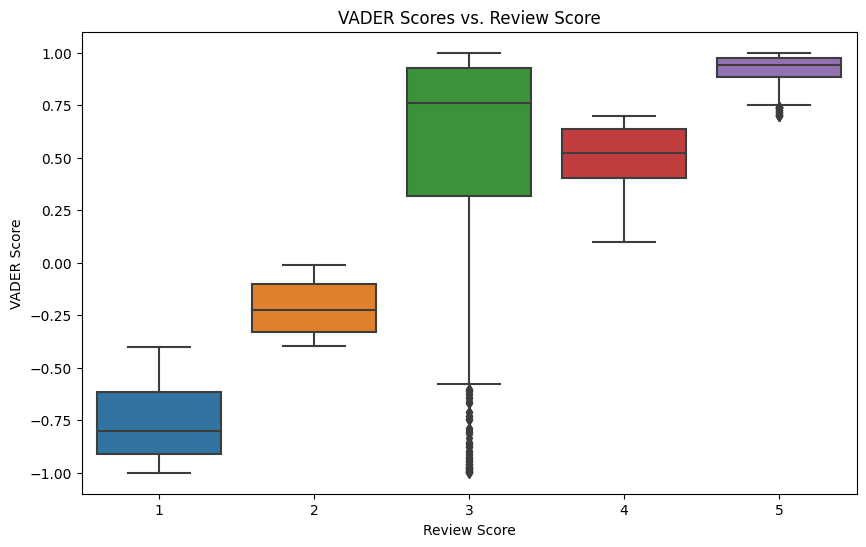

In [9]:
# visualize distribution of review scores
score_counts = df['Review Score'].value_counts()
print(score_counts)

# plot VADER scores vs. Review Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Review Score', y='VADER Score', data=df)
plt.title('VADER Scores vs. Review Score')
plt.xlabel('Review Score')
plt.ylabel('VADER Score')
plt.show()

In [10]:
# separate dataframe by review score
df_3 = df[df['Review Score'] == 3]
df_5 = df[df['Review Score'] == 5]
df_1 = df[df['Review Score'] == 1]
df_4 = df[df['Review Score'] == 4]
df_2 = df[df['Review Score'] == 2]

# find the size of the largest minority class
max_minority_size = max(len(df_1), len(df_4), len(df_2))

# downsample majority classes (3 and 5) to the size of the largest minority class
df_3_downsampled = resample(df_3, 
                            replace=False, 
                            n_samples=max_minority_size, 
                            random_state=42)
df_5_downsampled = resample(df_5, 
                            replace=False, 
                            n_samples=max_minority_size, 
                            random_state=42)

# upsample minority classes (4 and 2) to the size of the largest minority class
df_4_upsampled = resample(df_4, 
                          replace=True, 
                          n_samples=max_minority_size, 
                          random_state=42)
df_2_upsampled = resample(df_2, 
                          replace=True, 
                          n_samples=max_minority_size, 
                          random_state=42)

# Combine all classes to form the balanced dataset
df_balanced = pd.concat([df_3_downsampled, df_5_downsampled, df_1, df_4_upsampled, df_2_upsampled])

# Display new class counts
print(df_balanced['Review Score'].value_counts())

3    240
5    240
1    240
4    240
2    240
Name: Review Score, dtype: int64


In [11]:
# # generate initial Review Score: 4,5 if true; 1,2 if false
# df['Review Score'] = df['Positive Review'].apply(lambda x: np.random.choice([4, 5]) if x else np.random.choice([1, 2]))

# # assign neutral score to 20% of reviews to diversify
# neutral_indices = np.random.choice(df.index, size=int(0.2 * len(df)), replace=False)
# df.loc[neutral_indices, 'Review Score'] = 3 

# adjust the labels to start from 0 instead of 1
df_balanced['Review Score'] = df_balanced['Review Score'] - 1

# implement TF-IDF Vectorizer to Transform Text
tdidf_vectorizer = TfidfVectorizer()

# fit the vectorizer to the data
tdidf_vectorizer.fit(df_balanced['Review'])

# transform the data
X = tdidf_vectorizer.transform(df_balanced['Review']).toarray()

y = df_balanced['Review Score']

In [12]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [13]:
# neural network model
nn_model = keras.Sequential()

# input layer
input_layer = keras.layers.InputLayer(input_shape=(X_train.shape[1],))
nn_model.add(input_layer)

# first hidden layer
hidden_layer_1 = keras.layers.Dense(units=256, activation='relu')
nn_model.add(hidden_layer_1)
nn_model.add(keras.layers.Dropout(.3))

# second hidden layer
hidden_layer_2 = keras.layers.Dense(units=128, activation='relu')
nn_model.add(hidden_layer_2)
nn_model.add(keras.layers.Dropout(.3))

# third hidden layer
hidden_layer_3 = keras.layers.Dense(units=64, activation='relu')
nn_model.add(hidden_layer_3)
nn_model.add(keras.layers.Dropout(.3))

# output layer
output_layer = keras.layers.Dense(units=5, activation='softmax') # 5 because of our rating of 1-5 and softmax bc multi-class classification
nn_model.add(output_layer)

# Print summary of neural network model structure
nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               3175424   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 5)                 3

In [14]:
# compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(class_weights))

# show class weights
print("Class Weights:", class_weights)

# define learning rate scheduler
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

callback_lr = tf.keras.callbacks.LearningRateScheduler(scheduler)

Class Weights: {0: 0.964824120603015, 1: 1.037837837837838, 2: 0.9846153846153847, 3: 1.0212765957446808, 4: 0.9948186528497409}


In [15]:
# compile the model
# optimizer value because it adapts the learning rate based on the first and second moments of the gradients
# loss value can handle integer labels (1-5) for multi-class classification
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# training the model
early_stopping = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)

nn_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test),
             class_weight=class_weights, callbacks=[early_stopping, callback_lr])
# nn_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
30/30 [==============================] - 1s 19ms/step - loss: 1.6082 - accuracy: 0.2313 - val_loss: 1.6061 - val_accuracy: 0.3375 - lr: 1.0000e-04
Epoch 2/20
30/30 [==============================] - 0s 14ms/step - loss: 1.6042 - accuracy: 0.3073 - val_loss: 1.6020 - val_accuracy: 0.4000 - lr: 1.0000e-04
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 1.5982 - accuracy: 0.3635 - val_loss: 1.5964 - val_accuracy: 0.4042 - lr: 1.0000e-04
Epoch 4/20
30/30 [==============================] - 0s 15ms/step - loss: 1.5879 - accuracy: 0.4333 - val_loss: 1.5873 - val_accuracy: 0.4375 - lr: 1.0000e-04
Epoch 5/20
30/30 [==============================] - 0s 16ms/step - loss: 1.5723 - accuracy: 0.4802 - val_loss: 1.5726 - val_accuracy: 0.4792 - lr: 1.0000e-04
Epoch 6/20
30/30 [==============================] - 0s 16ms/step - loss: 1.5483 - accuracy: 0.5635 - val_loss: 1.5487 - val_accuracy: 0.5083 - lr: 1.0000e-04
Epoch 7/20
30/30 [==============================] - 

In [17]:
# evaluate the model
loss, accuracy = nn_model.evaluate(X_test, y_test)
print(f'Neural Network Model Accuracy: {accuracy:.4f}')

# make predictions
y_pred = np.argmax(nn_model.predict(X_test), axis=1)

# adjust predictions and test labels
y_pred_adjusted = y_pred + 1  # add 1 to shift from 0-4 to 1-5
y_test_adjusted = y_test.values + 1  

# evaluate the model's performance
print(classification_report(y_test_adjusted, y_pred_adjusted, zero_division=0))

8/8 [==============================] - 0s 2ms/step - loss: 0.7843 - accuracy: 0.7125
Neural Network Model Accuracy: 0.7125
8/8 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           1       0.62      0.56      0.59        41
           2       0.94      0.89      0.92        55
           3       0.47      0.60      0.53        45
           4       0.76      0.90      0.82        52
           5       0.78      0.53      0.63        47

    accuracy                           0.71       240
   macro avg       0.72      0.70      0.70       240
weighted avg       0.73      0.71      0.71       240



In [18]:
print('Review #1:\n')

print(original_reviews.iloc[24])

reviewRating = y_pred_adjusted[24]
    
print('\nPrediction: What is this reviews rating? {}\n'.format(reviewRating))

print('Actual: What is this reviews rating? {}\n'.format(y_test_adjusted[24]))

Review #1:

Unfortunately, this book is the sign of what passes for humour these days. Even though it may have been remotely funny (sometimes the author comes close to being bearable), the book never actually tries to be. 

Humour is supposed to be smart. However, this book gives us the worst case of dumb


Prediction: What is this reviews rating? 4

Actual: What is this reviews rating? 4



In [19]:
print('Review #2:\n')

print(original_reviews.iloc[11])

reviewRating = y_pred_adjusted[11]
    
print('\nPrediction: What is this reviews rating? {}\n'.format(reviewRating))

print('Actual: What is this reviews rating? {}\n'.format(y_test_adjusted[11]))

Review #2:

As a young woman I was appauled by Gurian's lack of respect for
women as human beings.What makes me the most furious is his 
shadowy writing which can lead a young woman to think she is 
only worth something if she squishes herself to allow the 
boys and men to take the lead in life.The resounding message is
girls and women are potentially inferior and cannot because of 
our hormones make important contributions to society beyond 
traditional roles.I don't remember ever being taken over by 
hormones and rendered down to a emotional bundle of primative 
chemical reactions he believes all females to be.
I agree with posters about this bridge brain foolishness.Gurian
is a master at twisting words around and you have to read his 
books being mindfull of his tricks.His book is full of agenda.


Prediction: What is this reviews rating? 2

Actual: What is this reviews rating? 2



In [20]:
print('Review #3:\n')

print(original_reviews.iloc[125])

reviewRating = y_pred_adjusted[125]
    
print('\nPrediction: What is this reviews rating? {}\n'.format(reviewRating))

print('Actual: What is this reviews rating? {}\n'.format(y_test_adjusted[125]))

Review #3:

Flynn offers up a fast-paced, if unbelievable story.  Unfortunately, character development is paper thin and clearly portrays Flynn's political preferences.  Characters, like Rapp, with a military background are guided by clearly defined ethical principles, have all the answers and are always showing those good-for-nothing politicians how the "real world" works.  Meanwhile, Flynn's politicians (the majority of whom are Democrats) seem only concerned with public opinion and the next election.  While there are grains of truth in his characters, Flynn consistently goes for the cheap, partisan stereotype.  I was looking for a well-developed political/military thriller.  I'm still looking.


Prediction: What is this reviews rating? 3

Actual: What is this reviews rating? 1

